### Embedding: Fit-SNE vs. UMAP

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

#### data

In [2]:
import pickle

In [3]:
with open('../../data/mnist/mnist_784.pkl', 'rb') as pkl:
    mnist = pickle.load(pkl)

In [4]:
df = mnist.data
df.head(3)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Before the embedding it is recommendable to perform a dimensionality reduction using PCA

In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer

In [6]:
pca = PCA(n_components = 0.90, whiten = False)
X = pca.fit_transform(df.iloc[:, 1:561])
X.shape

(70000, 68)

#### Use cosine similarity as the similarity measure  (normalize X to be of unit length)

In [7]:
length = np.sqrt((X**2).sum(axis=1)).reshape(-1, 1)
N = X / length
np.sum(N**2, axis = 1)

array([1., 1., 1., ..., 1., 1., 1.])

- to optimize the performance of FIt-SNE and UMAP algorithms data must be placed in continguos memory

In [8]:
N.flags

  C_CONTIGUOUS : False
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False

In [9]:
N = N.copy(order = 'C')

#### Embedding with FIt-SNE

In [10]:
from fitsne import FItSNE

In [11]:
%%time
ppx = 30
Y_tsne = FItSNE(N, no_dims = 2, perplexity = ppx);

CPU times: user 2min 57s, sys: 3.56 s, total: 3min
Wall time: 1min 28s


In [12]:
df_tsne = pd.concat((pd.DataFrame(Y_tsne, columns = ['y1', 'y2']), mnist.target), axis = 1)
df_tsne.head()

,y1,y2,class
0,7.359327,-48.133267,5
1,47.736104,-7.642143,0
2,62.936827,33.027934,4
3,-63.795368,46.819913,1
4,19.631087,18.400831,9


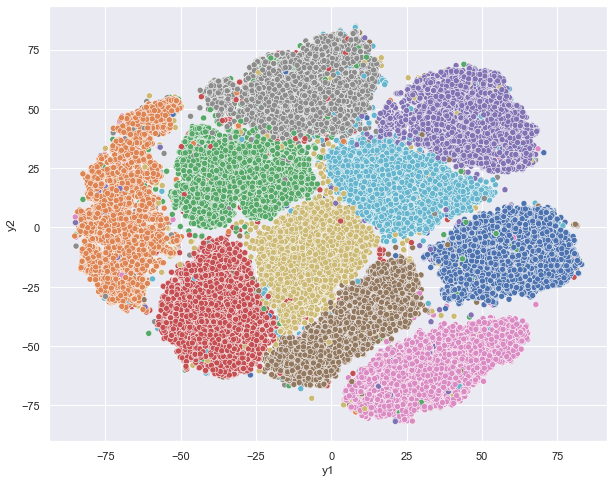

In [13]:
fig, axs = plt.subplots(1, 1, figsize = (10, 8))
sns.scatterplot(data = df_tsne, x = 'y1', y = 'y2', hue = 'class', legend = False, ax = axs);

#### Embedding with UMAP

In [14]:
from umap import UMAP
import tqdm

In [15]:
%%time
n_neighbors = 30
Y_umap = UMAP(n_neighbors = n_neighbors, min_dist = 0.3, metric = 'correlation').fit_transform(N)

CPU times: user 2min 47s, sys: 1.61 s, total: 2min 49s
Wall time: 1min 2s


In [16]:
df_umap = pd.concat((pd.DataFrame(Y_umap, columns = ['y1', 'y2']), mnist.target), axis = 1)
df_umap.head()

,y1,y2,class
0,3.412655,2.257570,5
1,-4.065830,0.868619,0
2,-3.258865,13.837623,4
3,13.641068,7.621365,1
4,2.376155,12.353498,9


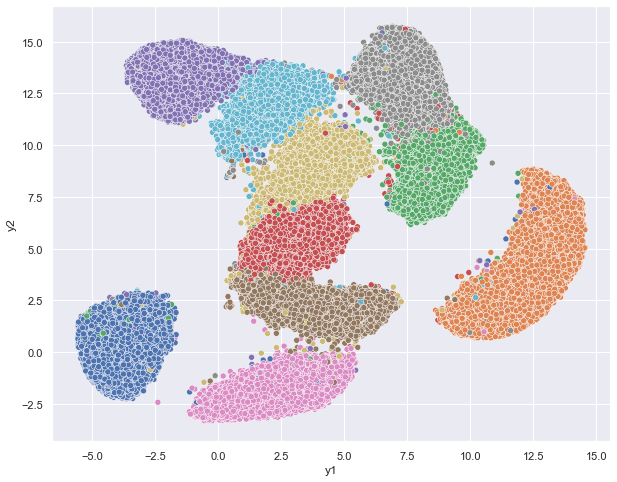

In [17]:
fig, axs = plt.subplots(1, 1, figsize = (10, 8))
sns.scatterplot(data = df_umap, x = 'y1', y = 'y2', hue = 'class', legend = False, ax = axs);